In [335]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

In [337]:
temperatures = np.array([953, 955, 948, 951, 957, 949, 954, 950, 959])

In [339]:
# 1a
median = np.median(temperatures)
print(f"Sample median: {median}")

Sample median: 953.0


In [341]:
# 1b
sorted_temps = np.sort(temperatures)
current_max = np.max(temperatures)
median_index = len(sorted_temps) // 2

print(f"Largest temperature measurement increase without changing the sample median: {current_max}")

Largest temperature measurement increase without changing the sample median: 959


In [343]:
# 1c
mean = np.mean(temperatures)
std_dev = np.std(temperatures, ddof=1)
print(f"Sample mean: {mean:.2f}")
print(f"Sample standard deviation: {std_dev:.2f}")

Sample mean: 952.89
Sample standard deviation: 3.72


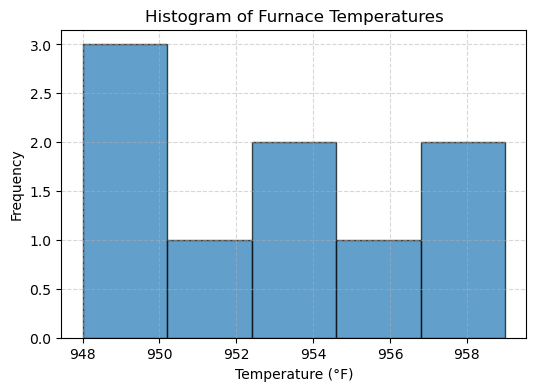

In [345]:
# 1d
plt.figure(figsize=(6, 4))
plt.hist(temperatures, bins='auto', edgecolor='black', alpha=0.7)
plt.title('Histogram of Furnace Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [347]:
# 1e
def stem_and_leaf(data):
    data_sorted = sorted(data)
    stem_leaf = {}
    for number in data_sorted:
        stem, leaf = divmod(number, 10)
        stem_leaf.setdefault(stem, []).append(leaf)
    print("Stem-and-leaf plot:")
    for stem in sorted(stem_leaf):
        leaves = ' '.join(str(leaf) for leaf in stem_leaf[stem])
        print(f"{stem} | {leaves}")

stem_and_leaf(temperatures)

Stem-and-leaf plot:
94 | 8 9
95 | 0 1 3 4 5 7 9


In [349]:
# 1f
Q1 = np.percentile(temperatures, 25)
Q3 = np.percentile(temperatures, 75)
print(f"Lower quartile (Q1): {Q1}")
print(f"Median (Q2): {median}")
print(f"Upper quartile (Q3): {Q3}")

Lower quartile (Q1): 950.0
Median (Q2): 953.0
Upper quartile (Q3): 955.0


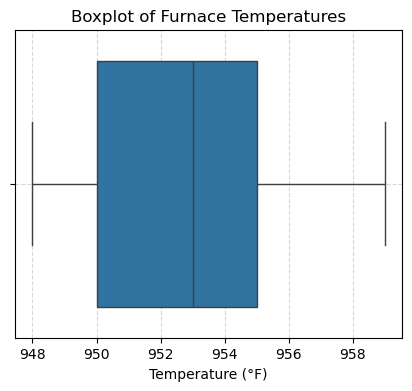

In [351]:
# 1g
plt.figure(figsize=(5, 4))
sns.boxplot(x=temperatures, orient='h')
plt.title('Boxplot of Furnace Temperatures')
plt.xlabel('Temperature (°F)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [353]:
# 1h
print("Brief description:")
print("Fairly symmetrically distribution.")
print("No big outliers.")
print("No huge standard deviation.")


Brief description:
Fairly symmetrically distribution.
No big outliers.
No huge standard deviation.


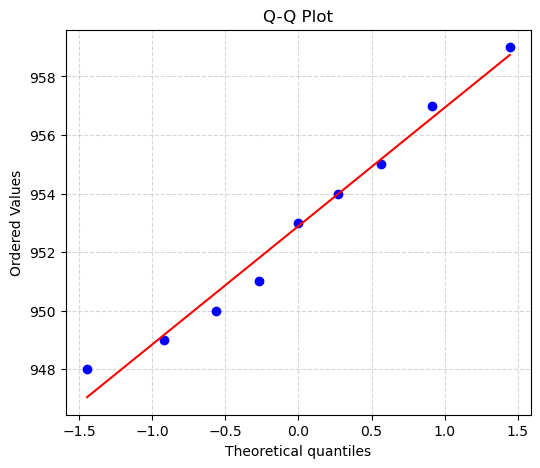

In [399]:
# 1i
plt.figure(figsize=(6, 5))
stats.probplot(temperatures, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [401]:
print("Normal distribution seems reasonable as data points basically follow a straight line.")

Normal distribution seems reasonable as data points basically follow a straight line.


In [403]:
# 2a
from scipy.stats import geom, binom

p = 0.15
# P(X = 3) = (1 - p)^(3 - 1) * p
a_prob = geom.pmf(3, p)
print(f"Probability that the third patient of the day is the first with high blood pressure: {a_prob:.4f}")

Probability that the third patient of the day is the first with high blood pressure: 0.1084


In [405]:
# 2b
b_expected = geom.mean(p)
print(f"Average number of patients that must be seen until first patient with high blood pressure: {b_expected:.2f}")

Average number of patients that must be seen until first patient with high blood pressure: 6.67


In [407]:
# 2c
n = 50
k = 10
c_prob = binom.pmf(k, n, p)
print(f"Probability of exactly 10 out of 50 patients having high blood pressure: {c_prob:.4f}")

Probability of exactly 10 out of 50 patients having high blood pressure: 0.0890


In [409]:
# 3a
from scipy.stats import hypergeom, binom
import matplotlib.pyplot as plt

In [411]:
N = 25             
K = 2              
n = 5              
x = 0              

In [413]:
prob_accept_exact = hypergeom.pmf(x, N, K, n)

In [415]:
print(f"Probability of acceptance: {prob_accept_exact:.5f}")

Probability of acceptance: 0.63333


In [417]:
# 3b
p_conforming = (N - K) / N  
prob_accept_binom = binom.pmf(n, n, p_conforming) 

In [419]:
print(f"Binomial approximation: {prob_accept_binom:.5f}")
print(f"Difference: {abs(prob_accept_exact - prob_accept_binom):.5f}")
print(f"Binomial approximation not satisfactory, > .10 .")

Binomial approximation: 0.65908
Difference: 0.02575
Binomial approximation not satisfactory, > .10 .


In [421]:
# 3c
N_large = 150
K_large = 2
n_sample = 5

In [423]:
prob_accept_large_exact = hypergeom.pmf(0, N_large, K_large, n_sample)

In [425]:
p_conforming_large = (N_large - K_large) / N_large
prob_accept_large_binom = binom.pmf(n_sample, n_sample, p_conforming_large)

In [427]:
print(f"Binomial approximation: {prob_accept_large_binom:.5f}")
print(f"Difference: {abs(prob_accept_large_exact - prob_accept_large_binom):.5f}")
print(f"Binomial approximation satisfactory, < .10 .")

Binomial approximation: 0.93509
Difference: 0.00086
Binomial approximation satisfactory, < .10 .


In [429]:
# 3d
target_accept_prob = 0.05
K_reject = 5
min_n = None

In [431]:
for n_test in range(1, N + 1):
    accept_prob = hypergeom.pmf(0, N, K_reject, n_test)
    if accept_prob <= target_accept_prob:
        min_n = n_test
        break

In [433]:
print(f"Minimum sample size to ensure rejection with 0.95 probability when K=5: {min_n}")

Minimum sample size to ensure rejection with 0.95 probability when K=5: 11


In [435]:
# 4
from scipy.stats import poisson

In [437]:
lambda_ = 0.1

In [439]:
p_at_least_one = 1 - poisson.pmf(0, mu=lambda_)

In [441]:
print(f"Probability of rsandom unit with at least one surface-finish defect: {p_at_least_one:.4f}")

Probability of rsandom unit with at least one surface-finish defect: 0.0952


In [453]:
# 5
from scipy.stats import norm

In [455]:
mean = 5000
std_dev = 50
percent_below = 0.005  

In [457]:
lsl = norm.ppf(percent_below, loc=mean, scale=std_dev)

In [459]:
print(f"Lower specification limit such that only 0.5% of the bulbs will not exceed this limit: {lsl:.2f} ")

Lower specification limit such that only 0.5% of the bulbs will not exceed this limit: 4871.21 


In [461]:
# 6
mu = 100
sigma = 2
lsl = 97
usl = 102

In [463]:
p_within_spec = norm.cdf(usl, mu, sigma) - norm.cdf(lsl, mu, sigma)
p_below_lsl = norm.cdf(lsl, mu, sigma)
p_above_usl = 1 - norm.cdf(usl, mu, sigma)

In [481]:
print(f"Proportion of process output within specifications: {p_within_spec:.4f}")

Proportion of process output within specifications: 0.7745


In [471]:
rework_cost = 1  
scrap_cost = 5  

In [473]:
mean_range = np.linspace(97, 103, 200)
costs = []

for mu_shifted in mean_range:
    p_below = norm.cdf(lsl, mu_shifted, sigma)
    p_above = 1 - norm.cdf(usl, mu_shifted, sigma)
    expected_cost = (p_below * rework_cost) + (p_above * scrap_cost)
    costs.append(expected_cost)

In [487]:
min_cost = min(costs)
optimal_mean = mean_range[np.argmin(costs)]

print(f"Make the mean {optimal_mean:.2f}")

Make the mean 98.21


In [489]:
#  6
n = 50
p = 12 / 38
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

In [491]:
x = 11.5  # continuity correction for P(X >= 12)
prob = 1 - stats.norm.cdf(x, loc=mu, scale=sigma)

In [495]:
print(f"Probability that Laura wins at least 12 times: {prob:.4f}")

Probability that Laura wins at least 12 times: 0.9041
